c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


--- Выполнение точечной привязки ---

--- Попытка связать: 42049.png | motionbsplineloop | poisson ---
Успешно связано: 42049_motionbsplineloop_poisson.png

Количество связанных изображений после точечной привязки: 1


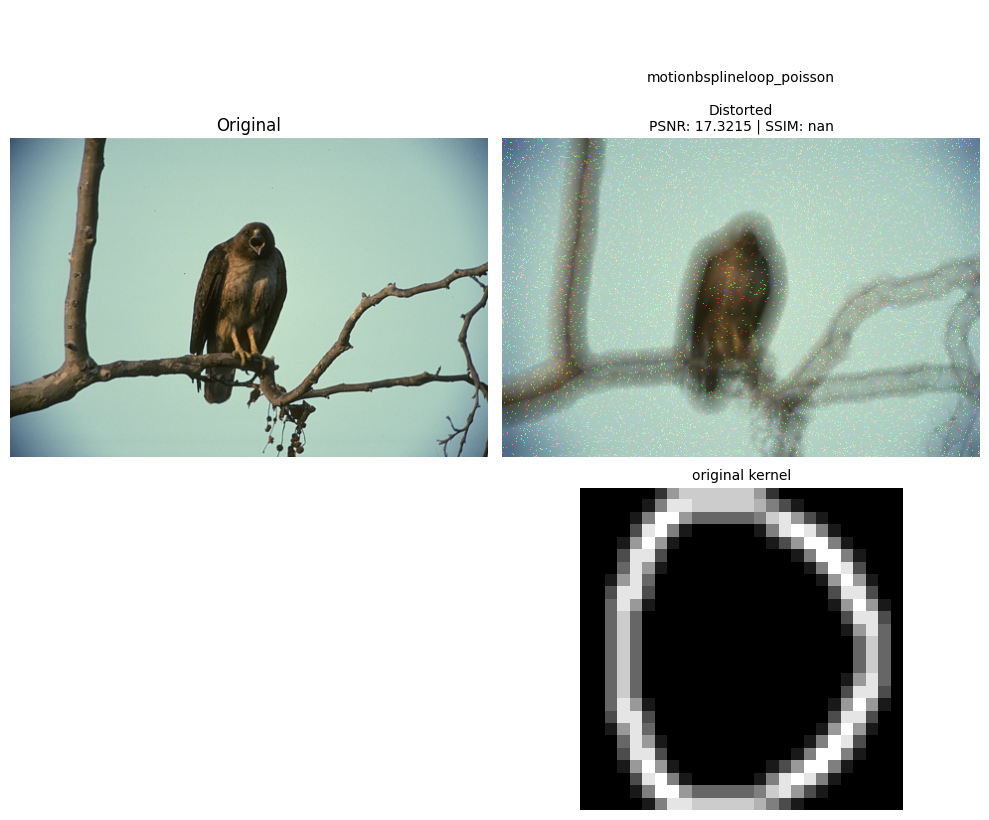


--- Выполнение полной автоматической привязки ---

=== Начало автоматического связывания датасета ===
Сканирование папки: images\benchmark\distorted

--- Попытка связать: 41069.png | defocuscone | none ---
Успешно связано: 41069_defocuscone.png

--- Попытка связать: 41069.png | defocuscone | gaussian ---
Успешно связано: 41069_defocuscone_gaussian.png

--- Попытка связать: 41069.png | defocuscone | poisson ---
Успешно связано: 41069_defocuscone_poisson.png

--- Попытка связать: 41069.png | defocuscone | saltpepper ---
Успешно связано: 41069_defocuscone_saltpepper.png

--- Попытка связать: 41069.png | defocusdisk | none ---
Успешно связано: 41069_defocusdisk.png

--- Попытка связать: 41069.png | defocusdisk | gaussian ---
Успешно связано: 41069_defocusdisk_gaussian.png

--- Попытка связать: 41069.png | defocusdisk | poisson ---
Успешно связано: 41069_defocusdisk_poisson.png

--- Попытка связать: 41069.png | defocusdisk | saltpepper ---
Успешно связано: 41069_defocusdisk_saltpepper.png


In [ ]:
# main.py или jupyter notebook

from processing import Processing
from bind_dataset import bind_single_entry, bind_full_dataset

# 1. Создаем экземпляр вашего фреймворка
# Убедитесь, что пути соответствуют вашей структуре
proc = Processing(
    images_folder='images/benchmark/original',
    blurred_folder='images/benchmark/distorted',
    kernel_dir='images/benchmark/ground_truth_filters', # Эта папка здесь не используется, но нужна для инициализации
)

# --- Вариант 1: Точечная привязка нескольких файлов ---
print("--- Выполнение точечной привязки ---")
# Пример для файла без шума (если вы их тоже генерируете)
# bind_single_entry(
#     processing_instance=proc,
#     original_image_name='image001.png',
#     blur_filter_name='defocus_gaussian',
#     noise_name='none'
# )

# Пример для файла с шумом
bind_single_entry(
    processing_instance=proc,
    original_image_name='42049.png',
    blur_filter_name='motionbsplineloop',
    noise_name='poisson'
)

# Теперь можно посмотреть, что привязалось
print(f"\nКоличество связанных изображений после точечной привязки: {len(proc.images)}")
proc.show()


# --- Вариант 2: Полная автоматическая загрузка всего датасета ---

# Сначала очистим то, что привязали вручную
proc.clear_input() 
print("\n--- Выполнение полной автоматической привязки ---")

bind_full_dataset(processing_instance=proc)

# И снова посмотрим, что получилось
print(f"\nКоличество связанных изображений после полной привязки: {len(proc.images)}")
#НЕ РАСКОМЕНЧИВАТЬ <KZNM YF{EQ, ТАМ GBPLF!!!
# proc.show(size=0.5) # Уменьшим размер вывода, т.к. изображений может быть много

In [ ]:
# proc.show(size=0.5)